# Necessary Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading The Data

In [38]:
Aave= pd.read_csv('coin_Aave.csv')
Aave['Date']=pd.to_datetime(Aave['Date'])
Aave

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
270,271,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
271,272,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
272,273,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
273,274,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09


In [3]:
Aave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        275 non-null    int64         
 1   Name       275 non-null    object        
 2   Symbol     275 non-null    object        
 3   Date       275 non-null    datetime64[ns]
 4   High       275 non-null    float64       
 5   Low        275 non-null    float64       
 6   Open       275 non-null    float64       
 7   Close      275 non-null    float64       
 8   Volume     275 non-null    float64       
 9   Marketcap  275 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 21.6+ KB


# Exploratory Data Analysis

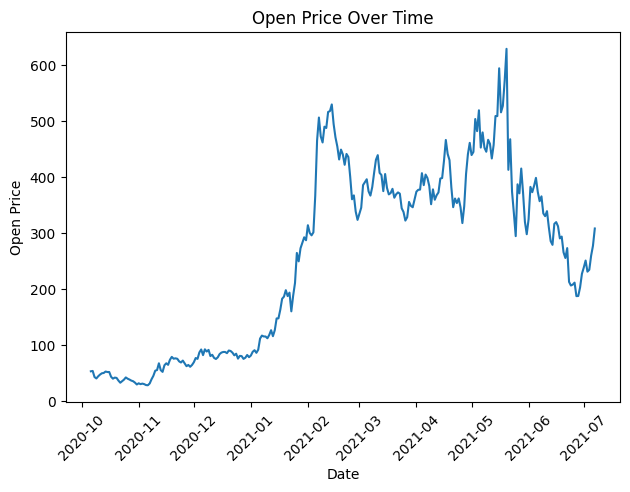

In [4]:
#Open prices over time
open_vis = plt.plot(Aave['Date'], Aave['Open'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.tight_layout()
plt.title('Open Price Over Time')
open_vis

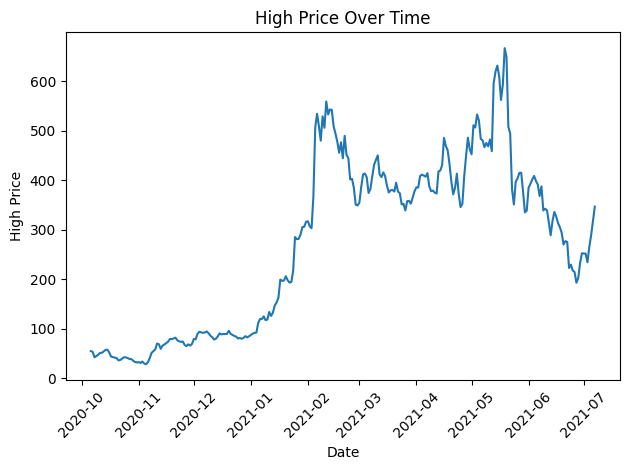

In [5]:
#High prices over time 
plt.plot(Aave['Date'],Aave['High'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price Over Time')
plt.tight_layout()

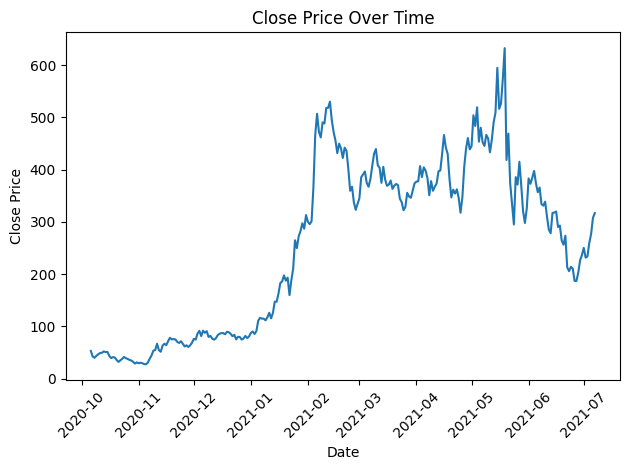

In [6]:
#Close prices over time
plt.plot(Aave['Date'],Aave['Close'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.tight_layout()

Text(0.5, 1.0, 'High Relationship with Close')

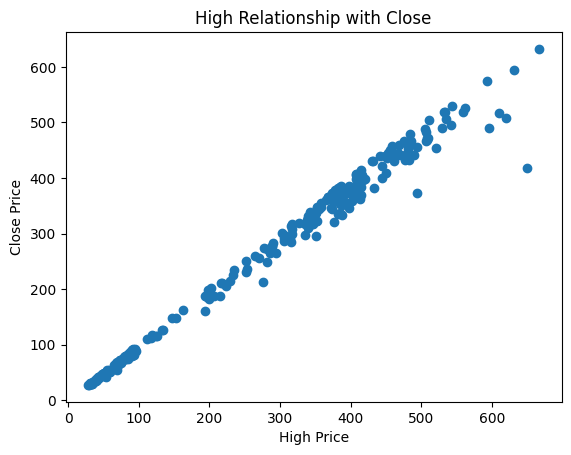

In [7]:
# High vs Close
plt.scatter(x=Aave['High'], y=Aave['Close'])
plt.xlabel('High Price')
plt.ylabel('Close Price')
plt.title('High Relationship with Close')

Text(0.5, 1.0, 'Open Relationship with Close')

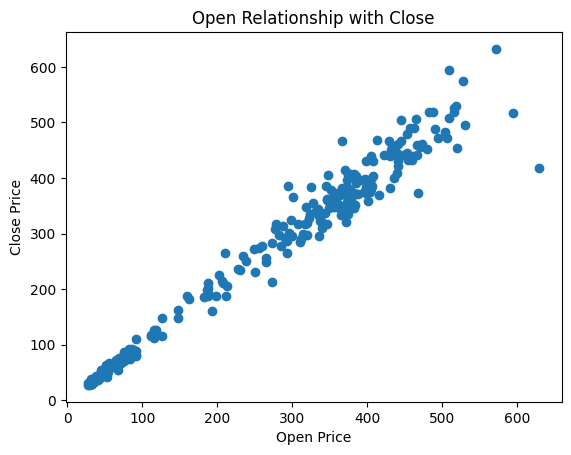

In [8]:
# Open vs Close
plt.scatter(Aave['Open'],Aave['Close'])
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open Relationship with Close')

# Linear Models

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Liner Regression

In [10]:
# Base Model
open_data=Aave[['Date','Open','Close']]
X = open_data[['Open']]
y = open_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
model=LinearRegression()
model.fit(X_train,y_train)
lin_pred= model.predict(X_test)

(array([18732., 18748., 18762., 18779., 18793., 18809.]),
 [Text(18732.0, 0, '2021-04-15'),
  Text(18748.0, 0, '2021-05-01'),
  Text(18762.0, 0, '2021-05-15'),
  Text(18779.0, 0, '2021-06-01'),
  Text(18793.0, 0, '2021-06-15'),
  Text(18809.0, 0, '2021-07-01')])

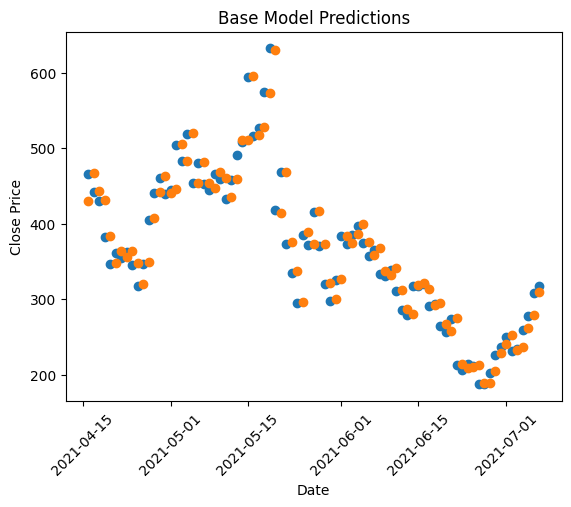

In [12]:
# Base model visualization
test_dates = open_data['Date'].iloc[y_train.shape[0]: y_train.shape[0] + y_test.shape[0]]
plt.scatter(test_dates,y_test)
plt.scatter(test_dates,lin_pred)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Base Model Predictions')
plt.xticks(rotation=45)

Multi-Linear Regression

In [13]:
# advance model
multi_data=Aave[['High','Open','Close']]
X = multi_data[['Open','High']]
y = multi_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
model=LinearRegression()
model.fit(X_train,y_train)
multi_pred= model.predict(X_test)

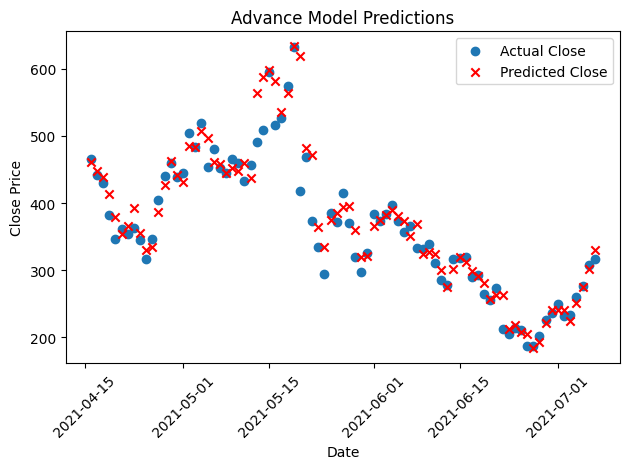

In [14]:
# advance model visualization 
plt.scatter(test_dates, y_test, label='Actual Close')
plt.scatter(test_dates, multi_pred, marker='x', color='red',label='Predicted Close')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("Advance Model Predictions")
plt.legend()
plt.tight_layout()

# Time Series Analysis

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [16]:
df=Aave[['Date','Close']].set_index('Date')
df

,Close
Date,
2020-10-05 23:59:59,53.219243
2020-10-06 23:59:59,42.401599
2020-10-07 23:59:59,40.083976
2020-10-08 23:59:59,43.764463
2020-10-09 23:59:59,46.817744
...,...
2021-07-02 23:59:59,233.948437
2021-07-03 23:59:59,259.655225
2021-07-04 23:59:59,277.038792


In [17]:
#ADF Test
def check_stationarity(series):
    result= adfuller(series.values)
    print('ADF Statistic:  %f' % result[0])
    print('p-val: %f' %result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))
    if (result[1]<=0.05) & (result[4]['5%']> result[0]):
        print('\u001b[32mStationary\u001b[0m')
    else:
        print('\x1b[31mNon-stationary\x1b[0m')

In [18]:
check_stationarity(df)

ADF Statistic:  -1.493670
p-val: 0.536640
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
Non-stationary


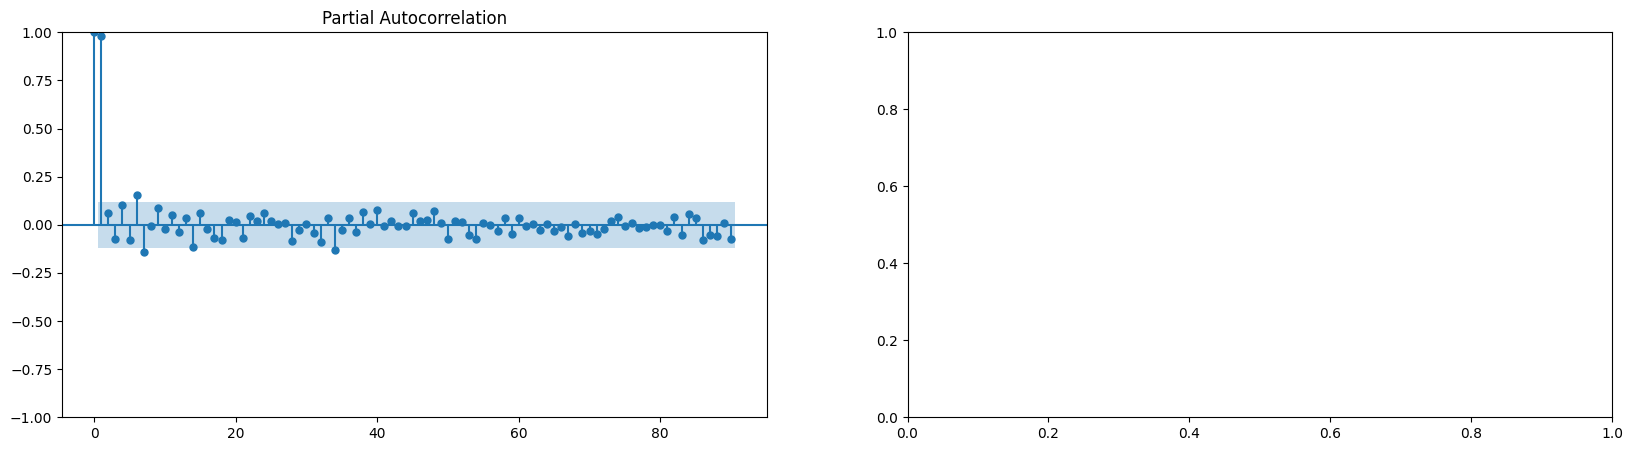

In [19]:
# PACF plot
f, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,5))
plot_pacf(df, ax=ax[0], lags=90);
# best p between 1-35


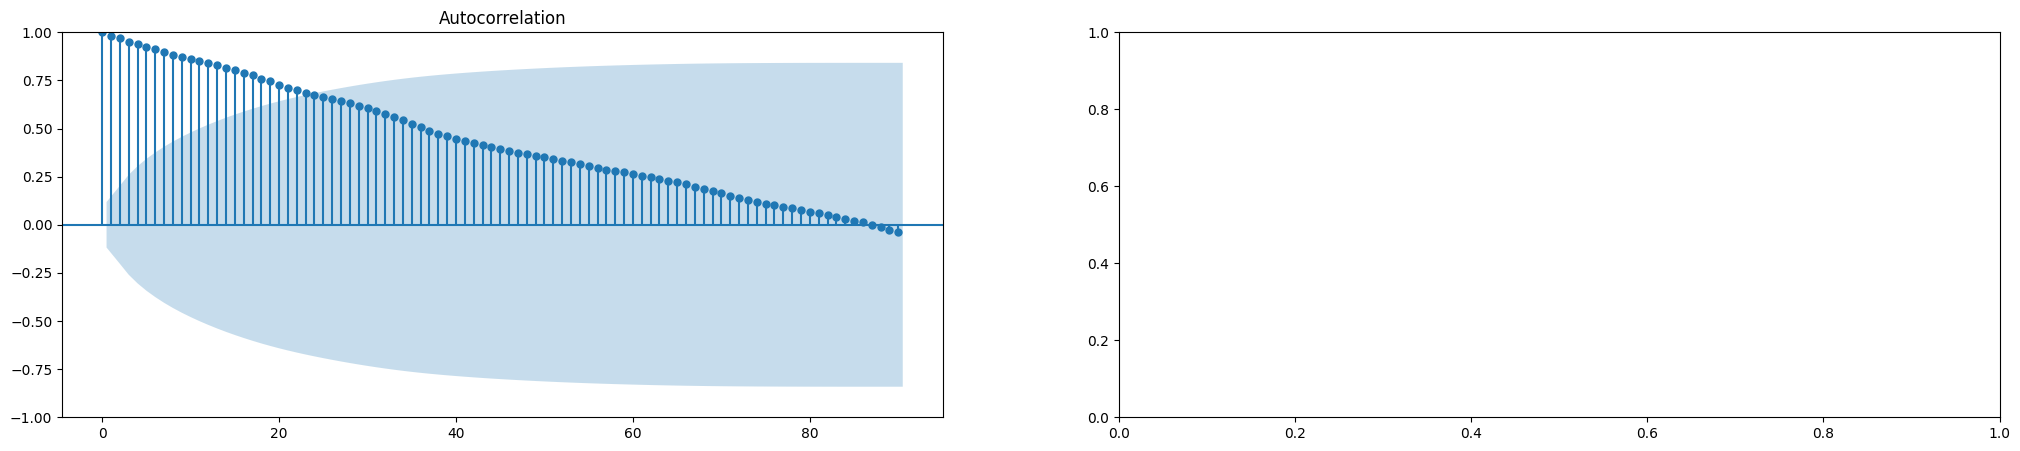

In [20]:
# ACF plot
f, ax=plt.subplots(nrows=1, ncols=2, figsize=(25,5))
plot_acf(df, ax=ax[0], lags=90);
# Best q between 1-24

In [21]:
# Train-Test split
train_size = int(len(df) * 0.7)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [22]:
train.index

DatetimeIndex(['2020-10-05 23:59:59', '2020-10-06 23:59:59',
               '2020-10-07 23:59:59', '2020-10-08 23:59:59',
               '2020-10-09 23:59:59', '2020-10-10 23:59:59',
               '2020-10-11 23:59:59', '2020-10-12 23:59:59',
               '2020-10-13 23:59:59', '2020-10-14 23:59:59',
               ...
               '2021-04-05 23:59:59', '2021-04-06 23:59:59',
               '2021-04-07 23:59:59', '2021-04-08 23:59:59',
               '2021-04-09 23:59:59', '2021-04-10 23:59:59',
               '2021-04-11 23:59:59', '2021-04-12 23:59:59',
               '2021-04-13 23:59:59', '2021-04-14 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=192, freq=None)

Hyper Parameter Tuning

In [ ]:
# Finding the best param for (p,d,q)
import itertools
start_p = 1
max_p = 35
start_q = 1
max_q = 24
start_d = 0
max_d = 2

# Create the parameter grid
p = range(start_p, max_p + 1)
d = range(start_d, max_d + 1)
q = range(start_q, max_q + 1)

pdq_params = list(itertools.product(p, d, q))

best_aic = float('inf')
best_param = None
best_model = None

for param in pdq_params:
    try:
        model = ARIMA(train, order=param, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()

        if results.aic < best_aic:
            best_aic = results.aic
            best_param = param
            best_model = results

    except Exception as e:
        print(f"ARIMA{param} failed: {e}")
        continue

print("Best ARIMA parameters:", best_param)
print("Best AIC:", best_aic)

ARIMA Model

In [24]:
# Fitting ARIMA model
model = ARIMA(train["Close"], order=(35,2,1))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

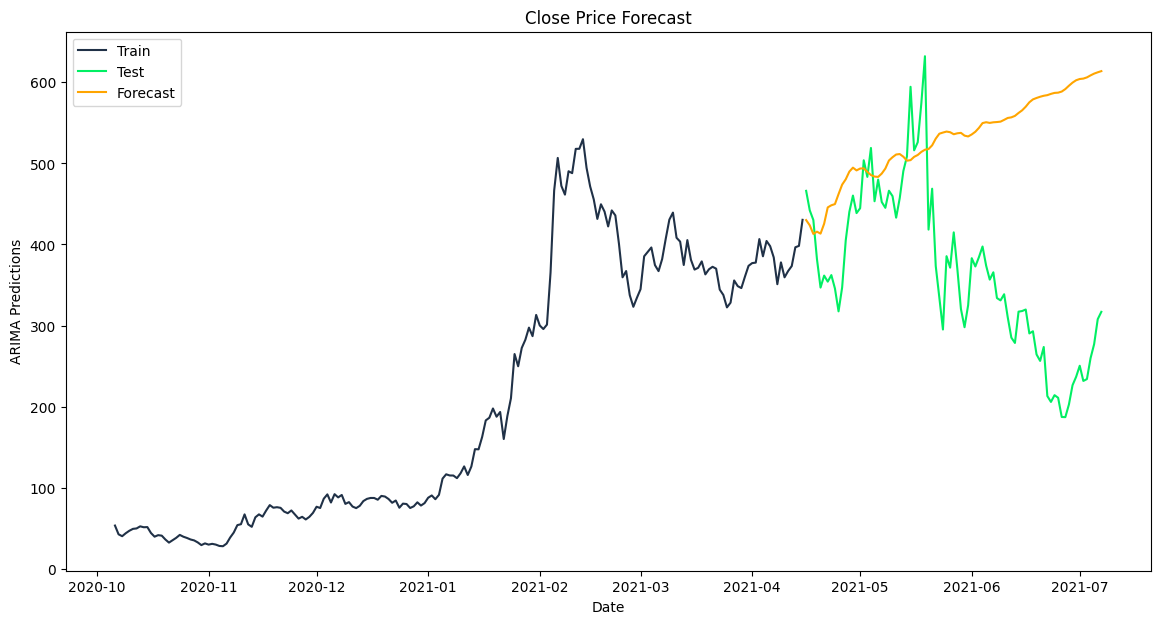

In [25]:
# ARIMA model visualization
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(14,7))
plt.plot(train.index, train["Close"], label='Train', color='#203147')
plt.plot(test.index, test["Close"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('ARIMA Predictions')
plt.legend()
plt.show()

SARIMA Model

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
# Fitting SARIMA Model
sarima = SARIMAX(train, order=(35, 2, 1), seasonal_order=(0, 2, 0, 2))
sarima_fit=sarima.fit()
pred=sarima_fit.predict(start=test.index[0],end=test.index[-1])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

Text(0.5, 1.0, 'SARIMA Predictions')

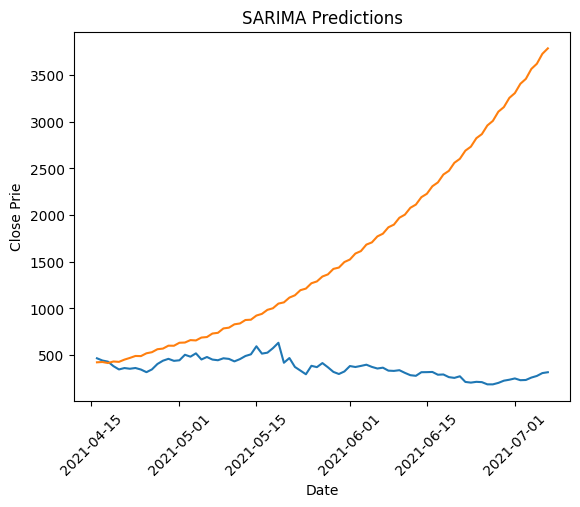

In [28]:
# SARIMA Visualization 
plt.plot(test)
plt.plot(pred)
plt.xlabel('Date')
plt.ylabel('Close Prie')
plt.xticks(rotation=45)
plt.title('SARIMA Predictions')

# Model Evaluations

In [29]:
def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))

In [30]:
# RMSE for base model
rmse(y_test, lin_pred)

np.float64(41.265456837173986)

In [31]:
# RMSE for advance mdoel
rmse(y_test, multi_pred)

np.float64(32.49124588052414)

In [32]:
# RMSE for ARIMA
rmse(test['Close'], forecast.values)

np.float64(215.42741596338172)

In [33]:
# RMSE for SARIMA
rmse(test['Close'],pred.values)

np.float64(1630.0533164598974)

# The Advance Model Is The Best 